In [35]:
from freq_table import *
from wav_table import *
import pandas as pd
from scipy.io import wavfile

In [30]:
import math
import wave
import struct


freq = 440.0
data_size = 40000
fname = "test.wav"
frate = 11025.0
amp = 64000.0
nchannels = 1
sampwidth = 2
framerate = int(frate)
nframes = data_size
comptype = "NONE"
compname = "not compressed"
data = [math.sin(2 * math.pi * freq * (x / frate))
        for x in range(data_size)]
wav_file = wave.open(fname, 'w')
wav_file.setparams(
    (nchannels, sampwidth, framerate, nframes, comptype, compname))
for v in data:
    wav_file.writeframes(struct.pack('h', int(v * amp / 2)))
wav_file.close()

In [31]:
import wave
import struct
import numpy as np


data_size = 40000
fname = "test.wav"
frate = 11025.0
wav_file = wave.open(fname, 'r')
data = wav_file.readframes(data_size)
wav_file.close()
data = struct.unpack('{n}h'.format(n=data_size), data)
data = np.array(data)

w = np.fft.fft(data)
freqs = np.fft.fftfreq(len(w))
print(freqs.min(), freqs.max())
# (-0.5, 0.499975)

# Find the peak in the coefficients
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * frate)
print(freq_in_hertz)
# 439.8975

-0.5 0.499975
439.89750000000004


In [32]:
fname = "/Volumes/S190813/Coding/wav_utilities/wav_utilities/wav_files/simple_483.1204_sin.wav"
wav_file = wave.open(fname, 'r')
wav_file.getframerate()

44100

In [20]:
fname = "/Volumes/S190813/Coding/wav_utilities/wav_utilities/wav_files/simple_483.1204_sin.wav"
wav_file=wave.open(fname, 'r')
wav_file.getframerate()

44100

In [36]:
data_size = 40000
fname = "/Volumes/S190813/Coding/wav_utilities/wav_utilities/wav_files/mod_2524.0576_sin.wav"
frate = 44100
wav_file = wave.open(fname, 'r')
data = wav_file.readframes(data_size)
wav_file.close()
data = struct.unpack('{n}h'.format(n=data_size), data)
data = np.array(data)

w = np.fft.fft(data)
freqs = np.fft.fftfreq(len(w))
print(freqs.min(), freqs.max())
# (-0.5, 0.499975)

# Find the peak in the coefficients
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * frate)
print(freq_in_hertz)

-0.5 0.499975
2523.6225000000004


In [38]:
def detech_pitch(fname):

    data_size = 40000
    fname = fname
    wav_file = wave.open(fname, 'r')
    frate = wav_file.getframerate()
    data = wav_file.readframes(data_size)
    wav_file.close()
    data = struct.unpack('{n}h'.format(n=data_size), data)
    data = np.array(data)

    w = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(w))
    print(freqs.min(), freqs.max())
    # (-0.5, 0.499975)

    # Find the peak in the coefficients
    idx = np.argmax(np.abs(w))
    freq = freqs[idx]
    freq_in_hertz = abs(freq * frate)
    print(freq_in_hertz)


In [41]:
detech_pitch("/Volumes/S190813/Coding/wav_utilities/wav_utilities/time_pitch_shift/stretched.wav")

-0.5 0.499975
280.0


In [46]:
stretch_algorithim_2("/Volumes/S190813/Coding/wav_utilities/wav_utilities/time_pitch_shift/stretched.wav", .5, 'test_stretch.wav')

stretch_algorithim_2 complete


In [47]:
detech_pitch('test_stretch.wav')

-0.5 0.499975
560.0


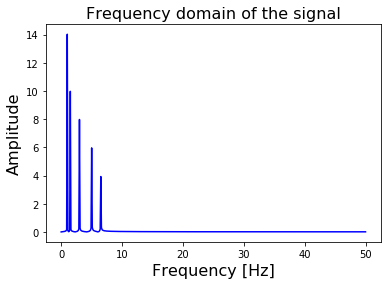

In [49]:

from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

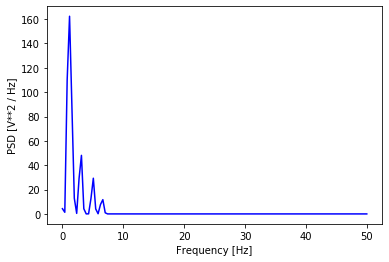

In [51]:

from scipy.signal import welch
 
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
 
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, psd_values = get_psd_values(composite_y_value, T, N, f_s)
 
plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.show()

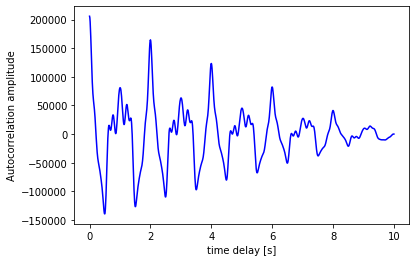

In [55]:

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
t_values, autocorr_values = get_autocorr_values(composite_y_value, T, N, f_s)
 
plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
plt.show()

In [34]:
data_size = 40000
fname = "/Volumes/S190813/Coding/wav_utilities/wav_utilities/wav_files/simple_483.1204_sin.wav"
frate = 44100
wav_file = wave.open(fname, 'r')
data = wav_file.readframes(data_size)
wav_file.close()
data = struct.unpack('{n}h'.format(n=data_size), data)
data = np.array(data)

w = np.fft.fft(data)
freqs = np.fft.fftfreq(len(w))
print(freqs.min(), freqs.max())
# (-0.5, 0.499975)

# Find the peak in the coefficients
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * frate)
print(freq_in_hertz)

-0.5 0.499975
482.895
